4. 분류

#4-1. 분류의 개요
* 지도학습: 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
* 분류: 머신러닝의 대표적인 유형
  + 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별함
* 분류를 구현하는 다양한 머신러닝 알고리즘
  + 베이즈 통계와 생성 모델에 기반한 나이브 베이즈
  + 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀
  + 데이터 균일도에 따른 규칙 기반의 결정 트리
  + 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신
  + 근접 거리를 기준으로 하는 최소 근접 알고리즘
  + 심층 연결 기반의 신경망
  + 서로 다른 (또는 같은) 머신러닝 알고리즘을 결합한 앙상블
* 앙상블
  + 매우 높은 예측 성능으로 인해 정형 데이터의 예측 분석 영역에서는 많은 분석가와 데이터 과학자들에게 애용됨
  + 서로 다른/같은 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로는 배깅과 부스팅 방식으로 나뉨
    - 랜덤포레스트: 배깅 방식으로 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성 등으로 많은 분석가가 애용하는 알고리즘
    - 그래디언트 부스팅: 부스팅 방식으로 뛰어난 예측 성능을 가지지만 수행 시간이 너무 오래 걸려서 최적화 모델 튜닝이 어려움
    - XgBoost, LightGBM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘들이 나타남
  + 결정트리
    - 앙상블의 기본 알고리즘으로 일반적으로 사용함
    - 매우 쉽고 유연하게 적용될 수 있음
    - 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음
    - 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합을 발생해 예측 성능이 저하될 수 있음
    - 앙상블은 매우 많은 여러 개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시키므로 결정 트리가 좋은 약한 학습기가 됨
  

#4-2. 결정 트리
* ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘
* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦
* 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함
* 결정 트리의 구조
  + 규칙 노드: 규칙 조건
  + 리프 노드: 결정된 클래스 값
  + 새로운 규칙 조건마다 서브 트리가 생성됨
  + 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음
* 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함 => 최대한 균일한 데이터 세트를 구성할 수 있도록 분할하는 것이 중요
* 혼잡도가 높고 균일도가 낮을수록 같은 조건에서 데이터를 판단하는 데에 더 많은 정보가 필요함
* 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
* 정보의 균일도를 측정하는 방법
 + 정보 이득
   - 엔트로피: 주어진 데이터 집합의 혼잡도, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음
   - 정보 이득 지수: 1 - 엔트로피 지수
   - 결정 크리는 정보 이득이 높은 속성을 기준으로 분할함
  + 지니 계수
    - 0이 가장 평등하고, 1로 갈수록 불평등함
    - 머신러닝에 적용도리 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할함
* 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트를 분할함
* 결정 트리의 일반적인 알고리즘은 정보 이득이 높거나 지니 계수가 낮음 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함

##4-2-1. 결정 트리 모델의 특징
* 정보의 '균일도'라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적임
* 룰이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어지는지 알 수 있고, 시각화로 표현까지 할 수 있음
* 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요 없음
* 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해지므로 과적합으로 인해 정확도가 떨어짐
* 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움이 됨

##4-2-2. 결정 트리 파라미터
* 사이킷런은 결정 트리 알고리즘을 구현한 DecicionTreeClassifier와 DicisionTreeRegressor 클래스를 제공함
  + DecisionTreeClassifier: 분류를 위한 클래스
  + DecisionTreeRegressor:회귀를 위한 클래스
* 사이킷런의 결정 트리 구현은 CART(Classification And Regression Trees) 알고리즘 기반임
* 사용 파라미터
  + min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어함
    - 디폴트는 2
    - 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
  + min_samples_leaf
    - 분할이 된 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수
    - 큰 값으로 설정될수록, 분할될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소하느이 샘플 데이터 조건을 만족시키기 어려우므로 노드 분할을 상대적으로 덜 수행함
    - 과적합 제어 용도
    - 비대칭적 데이터의 경우 특정 클래스의 데이터가 극조로 작을 수 있으므로 이 경에는 작게 설정할 필요가 있음
  + max_features
    - 최적의 분할을 위해 고려할 최대 피처 개수
    - 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
    - int 형 지정: 대상 피처의 수
    - float 형 지정: 전체 피처 중 대상 피처의 퍼센트
    - sqrt: 전체 피처중 sqrt(전체 피처 개수)
    - auto: sqrt와 동일
    - lod: 전체 피처 준 log2(전체 피처 개수)
    - None: 전체 피처 산정
  + max_depth
    - 트리의 최대 깊이 규정
    - 디폴트는 None, 완벽하에 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
    - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 갑승로 제어 필요
  + max_leaf_nodes: 말단 노드의 최대 개수

##4-2-3. 결정 트리 모델의 시각화
* Graphviz 패키지: 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지
* 사이킷런은 Graphviz 패키지와 쉽게 인터페이스할 수 있도록 export_graphviz() API를 제공함

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#DecisionTree Classifier 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

* export_graphviz(): Graphviz가 읽어 들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성함
* export_graphviz(인자로 학습이 완료도니 estimator, output 파일 명, 결정 클래스의 명칭, 피처의 명칭)

In [9]:
from sklearn.tree import export_graphviz
#export_graphviz()의 호출 결과로 out_file로 지정죈 tree.dot 파일을 생성함
export_graphviz(dt_clf,out_file="tree.dot",class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

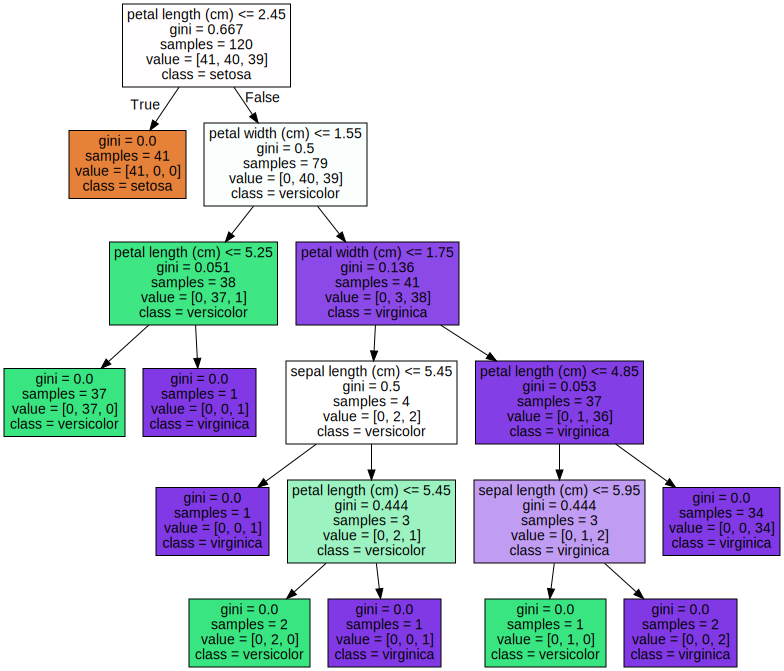

In [10]:
import graphviz

#위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

* 리프 노드
  + 더 이상 자식 노드가 없는 노드
  + 최종 클래스(레이블) 값이 결정되는 노드
  + 오직 하나의 클래스 값으로 최종 데이터가 구성되거나 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 됨
* 브랜치 노드
  + 자식 노드가 있는 노드
  + 자식 노드를 만들기 위한 분할 규칙 조건을 가지고 있음
    - gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수
    - samples는 현 규칙에 해당하는 데이터 건수
    - value=[]는 클래스 값 기반의 데이터 건수
* 각 노드의 색깔은 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

* 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요함
* 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델이 좀 더 간결하고 이상치에 강한 모델을 만들 수 있음
* feature_importance()
  + ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당됨
  + 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정화된 값으로 편함
  + 값이 높을수록 해당 피처의 중요도가 높음

feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<Axes: >

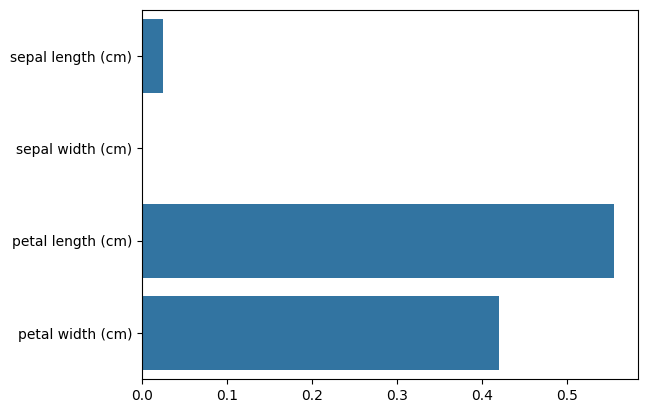

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("feature importance:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
  print('{0}:{1:.3f}'.format(name,value)) #{1:.3f}:포매팅할 값들의 두 번째 항목을 참조함 (인덱스는 0부터 시작하므로 1은 두 번째를 의미하며, 이 경우 value에 해당)

#feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

##4-2-4. 결정 트리 과적합
* make_classification()
  + 분류를 위한 테스트용 데이터를 쉽게 만들 수 있음
  + 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

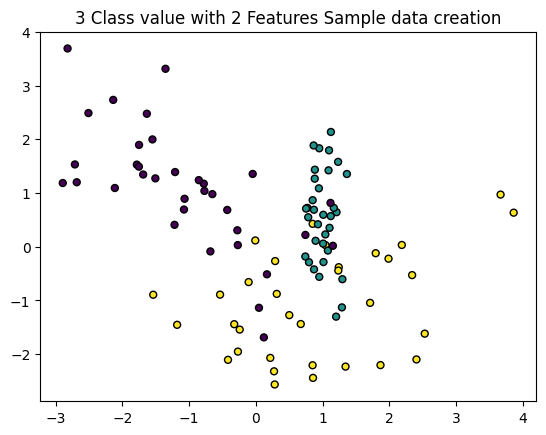

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class value with 2 Features Sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels= make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

* X_features[:,0]
  + : (행 선택): 모든 행을 선택하라는 의미로 모든 데이터 샘플을 포함함
  + 0 (열 선택): 인덱스 0의 열, 즉 첫 번째 특징을 선택함
  + 결과: 모든 데이터 샘플의 첫 번째 특징 값들만 모은 1차원 배열이 X축 데이터임

* X_features[:,1]
  + : (행 선택): 모든 행을 선택함
  + 1 (열 선택): 인덱스 1의 열, 즉 두 번째 특징을 선택함
  + 결과: 모든 데이터 샘플의 첫 번째 특징 값들만 모은 1차원 배열이 Y축 데이터임

* visualize_boundary(): 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타내 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있데 해줌

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=25, edgecolor='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

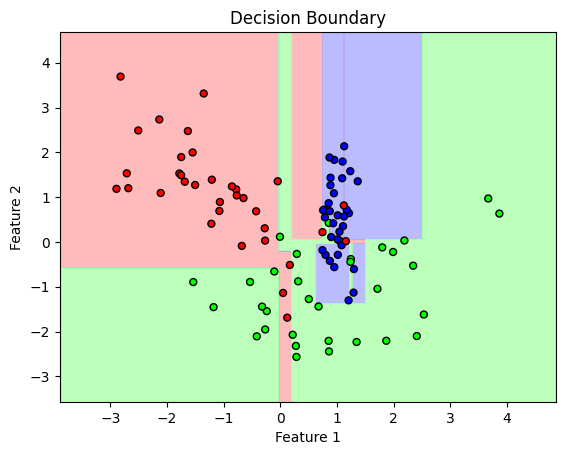

In [14]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

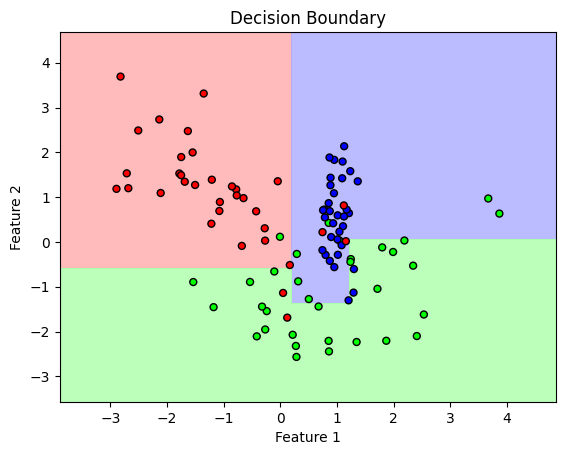

In [17]:
#min_sample_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

##4-2-5. 결정 트리 실습- 사용자 행동 인식 데이터 세트

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#featur.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드
import os
from google.colab import drive
drive.mount('/content/drive')
feature_name_df= pd.read_csv('/content/drive/MyDrive/features.txt', sep='\s+',header=None, names=['column_index','column_name'])

#피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

Mounted at /content/drive
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [19]:
#중복된 피처명이 얼마나 있는지 살펴봄
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


* get_new_feature_name_df(): 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2를 추가로 부여해 해로운 피처명을 가지는 DataFrame을 반환함

In [20]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

* .cumcount(): 그룹 내에서 누적 카운트를 계산함. 예를 들어, 'feature_A'가 3번 나오면 각각 0, 1, 2를 할당함.
* pd.DataFrame(..., columns=['dup_cnt']): 이 누적 카운트 결과를 'dup_cnt'라는 이름의 새 열을 가진 데이터프레임(feature_dup_df)으로 만듦
* feature_dup_df = feature_dup_df.reset_index(): 이전 단계에서 그룹화로 인해 인덱스가 되었던 'column_name' 및 원래 데이터프레임의 인덱스를 일반 열로 다시 돌림
* old_feature_name_df.reset_index(): 기존 데이터프레임의 인덱스를 초기화하여 병합 키로 활용할 수 있도록 함
* groupby().cumcount()가 인덱스를 보존했기 때문에, 이 병합은 인덱스를 기준으로 두 데이터프레임의 열을 옆으로 합치는 효과를 냄
* .apply(..., axis=1): 선택된 두 열의 각 행에 대해 람다 함수를 적용함
* lambda x: x[0] + '_' + str(x[1]) if x[1]>0 else x[0]: 이것이 이름 생성 규칙임
  + 조건: 만약 중복 카운트 x[1]이 0보다 크면 (즉, 두 번째 이상 나타나는 중복 컬럼이면)
    - 새 이름: 원래 컬럼 이름 x[0] 뒤에 언더바(_)와 중복 카운트 x[1]을 문자열로 변환하여 붙임 (예: feature_A → feature_A_1, feature_A_2...)
  + 조건: 중복 카운트가 0이면 (즉, 첫 번째로 나타나거나 유일한 컬럼이면)
    - 새 이름: 원래 컬럼 이름 x[0]을 그대로 사용함
* new_feature_name_df = new_feature_name_df.drop('index', axis=1): 병합 과정에서 생긴 불필요한 'index'라는 열을 제거함

In [21]:
import pandas as pd

def get_human_dataset():

  #각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
  feature_name_df= pd.read_csv('/content/drive/MyDrive/features.txt', sep='\s+',header=None, names=['column_index','column_name'])

  #중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df=get_new_feature_name_df(feature_name_df)

  #DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name=new_feature_name_df.iloc[:,1].values.tolist()

  #학습 피처 데이터세트와 테스트 피처 데이터세트를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
  X_train= pd.read_csv('/content/drive/MyDrive/X_train.txt', sep='\s+', names=feature_name)
  X_test= pd.read_csv('/content/drive/MyDrive/X_test.txt', sep='\s+', names=feature_name)

  #학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train= pd.read_csv('/content/drive/MyDrive/y_train.txt', sep='\s+', header=None,  names=['action'])
  y_test= pd.read_csv('/content/drive/MyDrive/y_test.txt', sep='\s+', header=None,  names=['action'])

  #로드된 학습/데이터용 DataFrame을 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=get_human_dataset()

In [22]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [23]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


* 사이킷런의 DecisionTreeClassifier를 이용해 예측 분류를 수행함

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

#DecisionTreeClassifie의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


* 결정 트리의 트리 깊이가 예측 정확도에 주는 영향

In [25]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv=GridSearchCV(dt_clf,param_grid=params, scoring='accuracy', cv=5, verbose=1) #verbose=1: GridSearchCV가 작동하는 동안 진행 상황과 정보를 출력하도록 설정하는 매개변수
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


*cv_results_: CV세트에 하이퍼파라미터를 순차적으로 입력했을 때의 성능 수치를 가지고 있음

In [26]:
#GridSearchCV 객체의 cv_results_속성을 DataFrame으로 생성
cv_results_df=pd.DataFrame(grid_cv.cv_results_)

#max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


* 별도의 테스트 데이터 세트에서 min_samples_split은 16으로 고정하고 max_depth의 변화에 따른 값을 측정

In [27]:
max_depths=[6,8,10,12,16,20,24]

#max_depth 값을 변화시키면서 그때마다 학습과 데이터 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf=DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred=dt_clf.predict(X_test)
  accuracy=accuracy_score(y_test,pred)
  print('max_depth={0} 정확도:{1:.4f}'.format(depth,accuracy))

max_depth=6 정확도:0.8551
max_depth=8 정확도:0.8717
max_depth=10 정확도:0.8599
max_depth=12 정확도:0.8571
max_depth=16 정확도:0.8599
max_depth=20 정확도:0.8565
max_depth=24 정확도:0.8565


* max_depth와 min_samples_split을 같이 변경하면서 정확도의 성능을 튜닝함

In [28]:
params={'max_depth': [8,12,16,20], 'min_samples_split': [16,24]}

grid_cv= GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


* 별도 분리된 테스트 데이터 세트에 해당 하이퍼 파라미터를 적용함

In [29]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


* 결정 트리에서 각 피처의 중요도를 feature_importances_를 이용해 알아봄

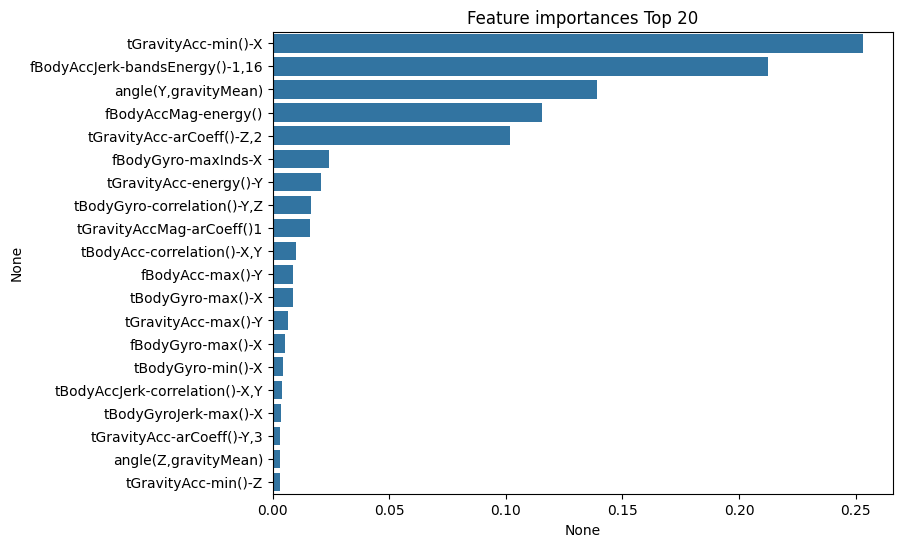

In [30]:
import seaborn as sns

ftr_importances_values=best_df_clf.feature_importances_

#Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)

#중요도값 순으로 Series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()